## 1. Preparing the datasets

### Libraries and useful functions

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
def plot_class_distribution(labels, title):
    if isinstance(labels, pd.DataFrame) or isinstance(labels, pd.Series):
        labels = labels.values.ravel()

    counter = Counter(labels)
    classes, counts = zip(*sorted(counter.items()))
    plt.bar(classes, counts, tick_label=[str(c) for c in classes])
    plt.title(title)
    plt.xlabel("Diagnosis")
    plt.ylabel("Frequency")
    plt.show()

In [3]:
def split_and_plot_data(X, y, ratios, n_splits, dataset_name):
    subsets = {}
    for train_ratio, test_ratio in ratios:
        for split_num in range(1, n_splits + 1):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_ratio, stratify=y, random_state=split_num
            )
            key = f"{dataset_name}_{int(train_ratio*100)}/{int(test_ratio*100)}_split{split_num}"
            subsets[key] = {
                "feature_train": X_train,
                "label_train": y_train,
                "feature_test": X_test,
                "label_test": y_test
            }

            # Hiển thị phân phối lớp cho tập train và test
            print(f"Class distribution for {key} Train Set:")
            plot_class_distribution(y_train, f"Train Set {key} Class Distribution")
            print(f"Class distribution for {key} Test Set:")
            plot_class_distribution(y_test, f"Test Set {key} Class Distribution")
    return subsets

### Breast Cancer Wisconsin

In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X_bcw = breast_cancer_wisconsin_diagnostic.data.features
y_bcw = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [6]:
print("Features Shape:", X_bcw.shape)
print("Labels Shape:", y_bcw.shape)
print("Class Distribution:\n", y_bcw.value_counts())

Features Shape: (569, 30)
Labels Shape: (569, 1)
Class Distribution:
 Diagnosis
B            357
M            212
Name: count, dtype: int64


In [7]:
X_bcw.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


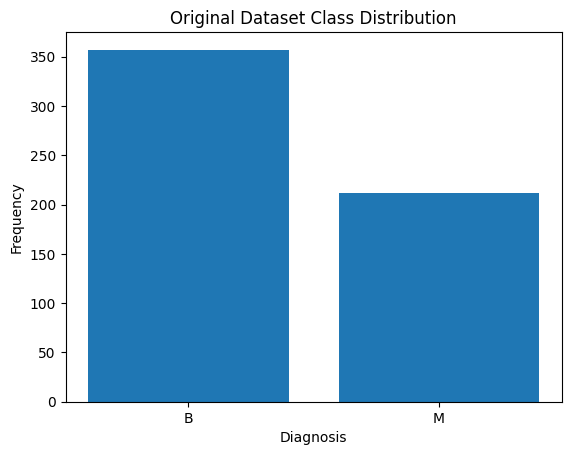

In [8]:
plot_class_distribution(y_bcw, "Original Dataset Class Distribution")

Class distribution for bcw_40/60_split1 Train Set:


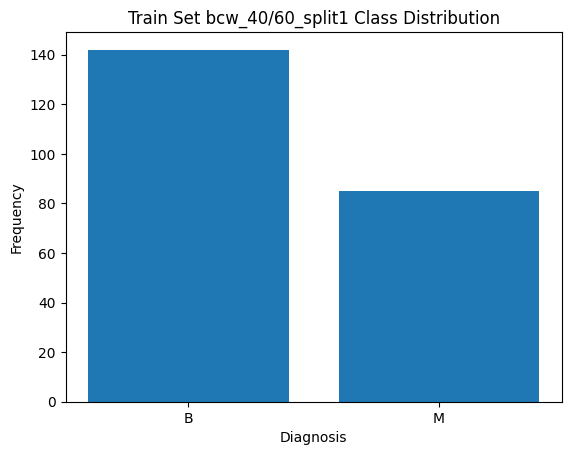

Class distribution for bcw_40/60_split1 Test Set:


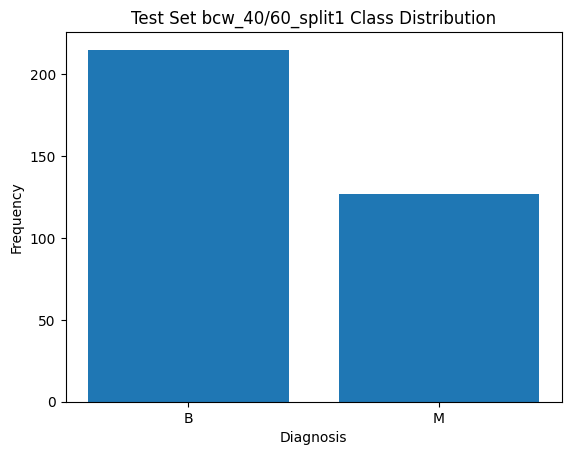

Class distribution for bcw_40/60_split2 Train Set:


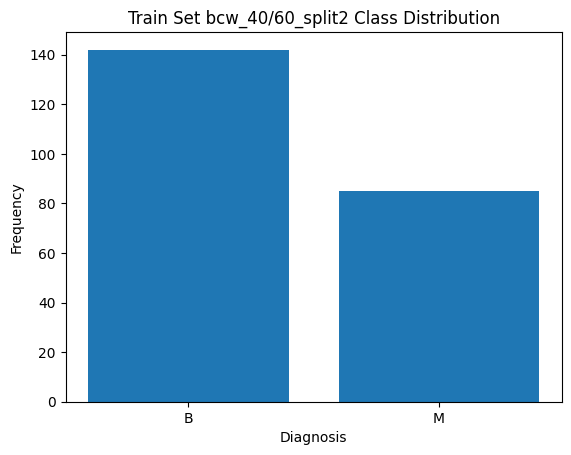

Class distribution for bcw_40/60_split2 Test Set:


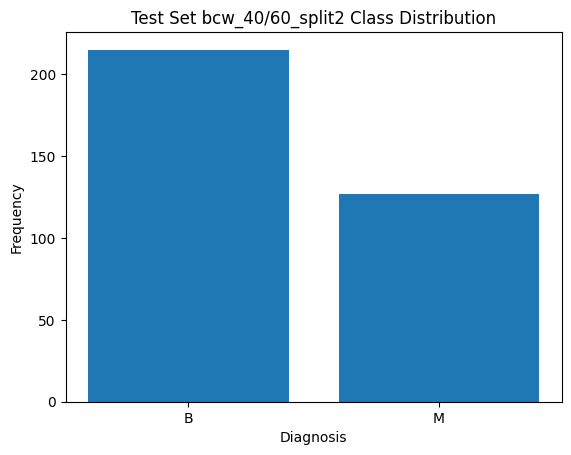

Class distribution for bcw_40/60_split3 Train Set:


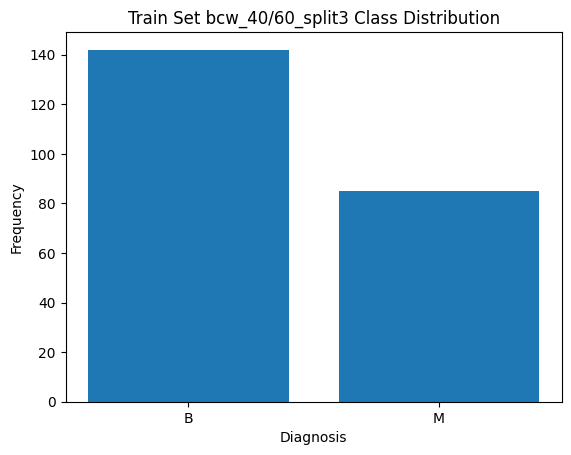

Class distribution for bcw_40/60_split3 Test Set:


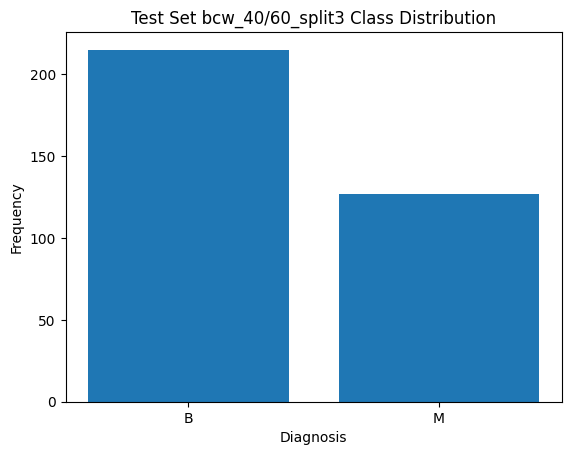

Class distribution for bcw_40/60_split4 Train Set:


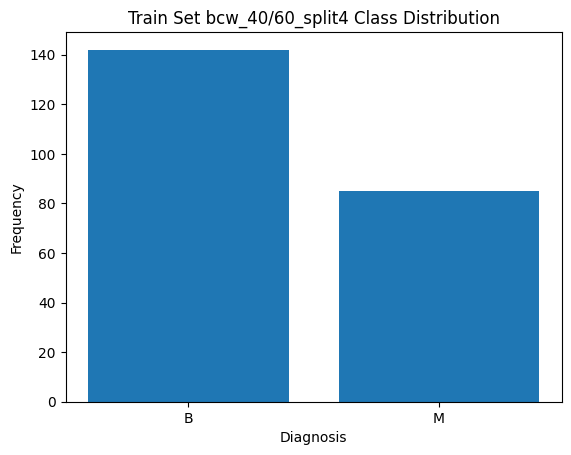

Class distribution for bcw_40/60_split4 Test Set:


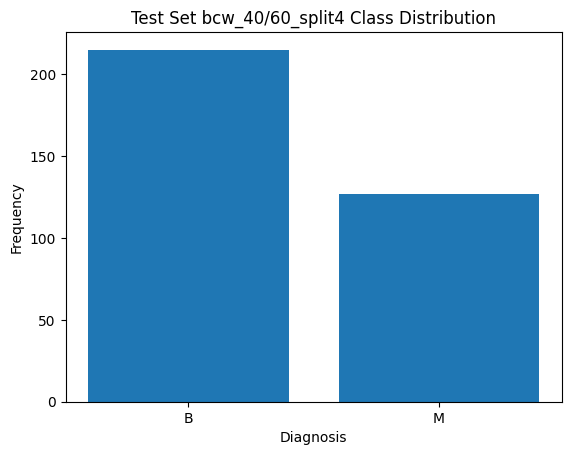

Class distribution for bcw_60/40_split1 Train Set:


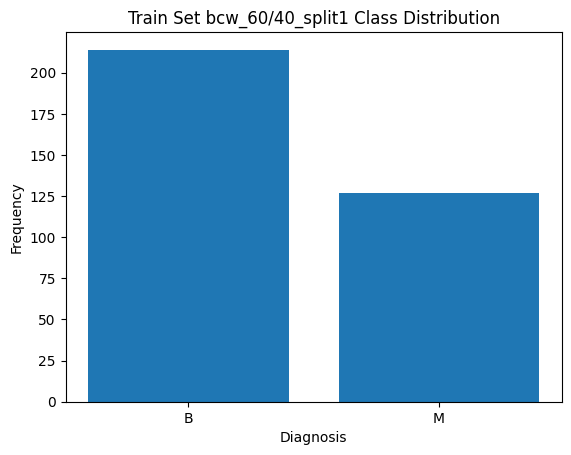

Class distribution for bcw_60/40_split1 Test Set:


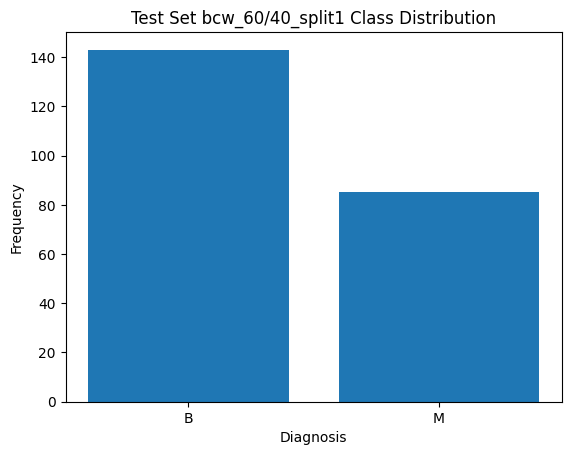

Class distribution for bcw_60/40_split2 Train Set:


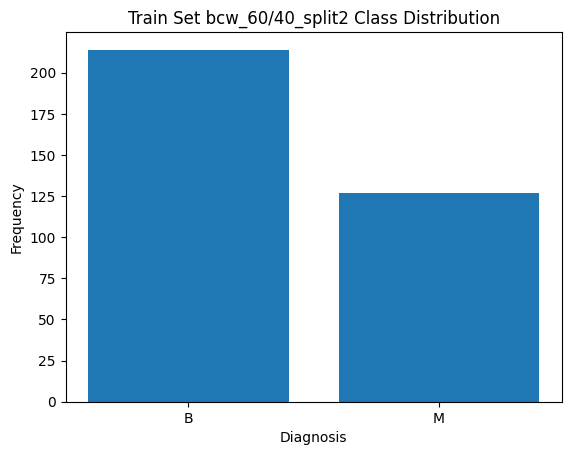

Class distribution for bcw_60/40_split2 Test Set:


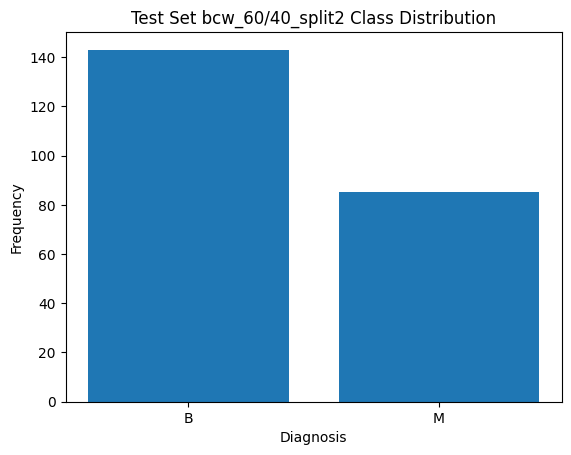

Class distribution for bcw_60/40_split3 Train Set:


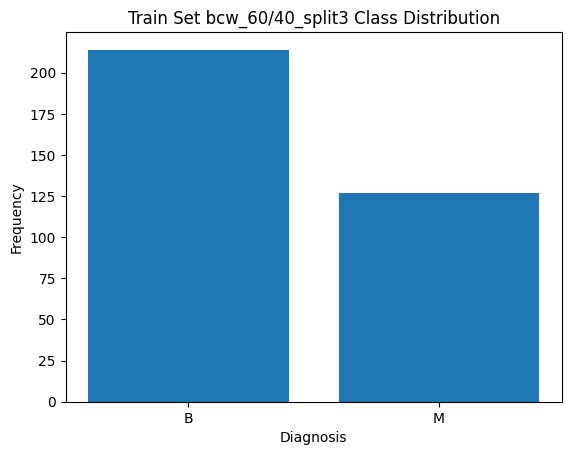

Class distribution for bcw_60/40_split3 Test Set:


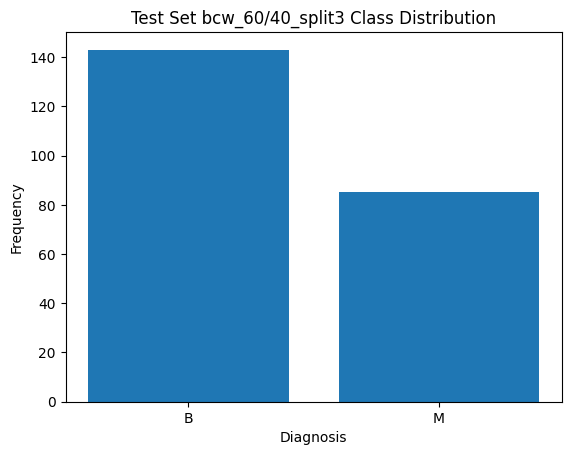

Class distribution for bcw_60/40_split4 Train Set:


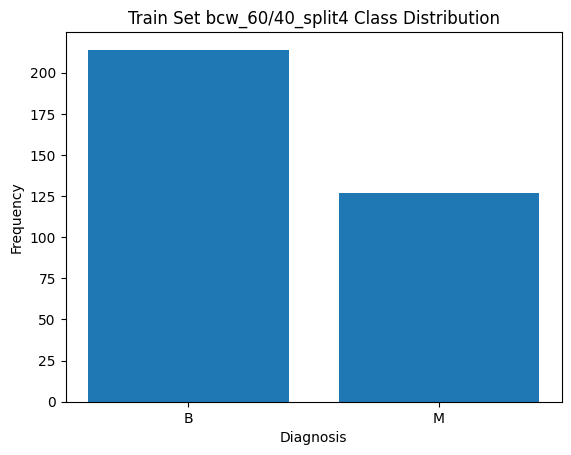

Class distribution for bcw_60/40_split4 Test Set:


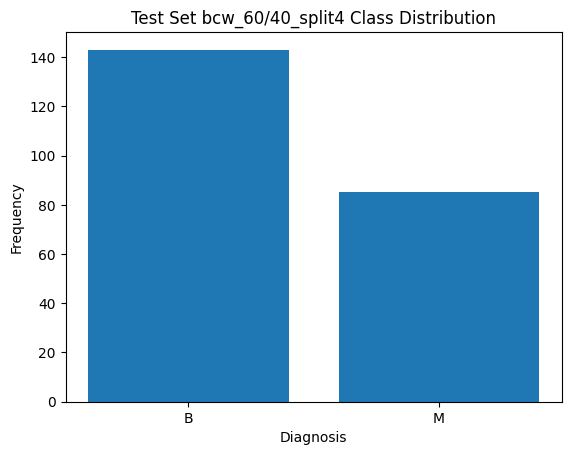

Class distribution for bcw_80/20_split1 Train Set:


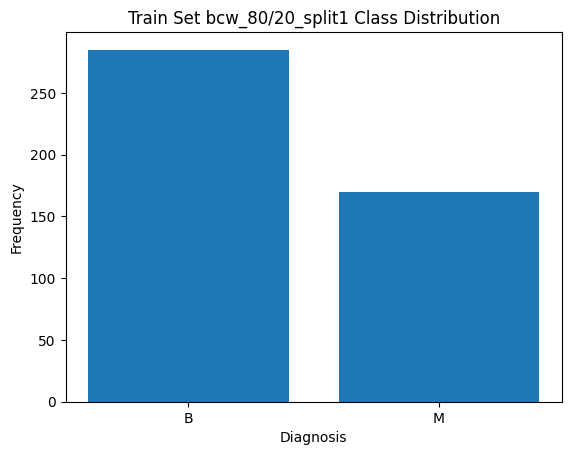

Class distribution for bcw_80/20_split1 Test Set:


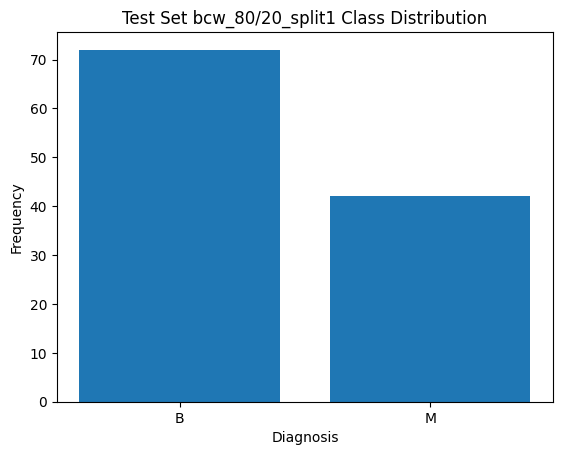

Class distribution for bcw_80/20_split2 Train Set:


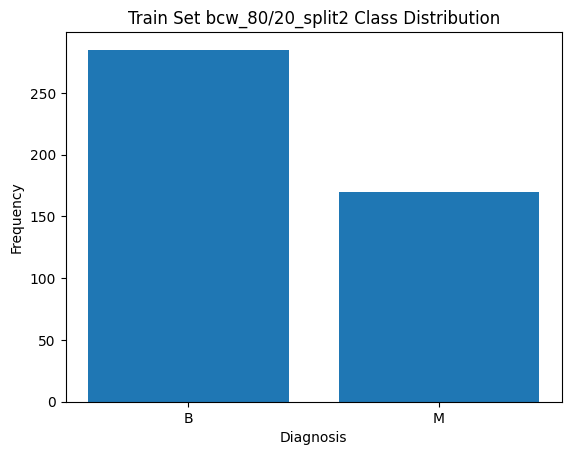

Class distribution for bcw_80/20_split2 Test Set:


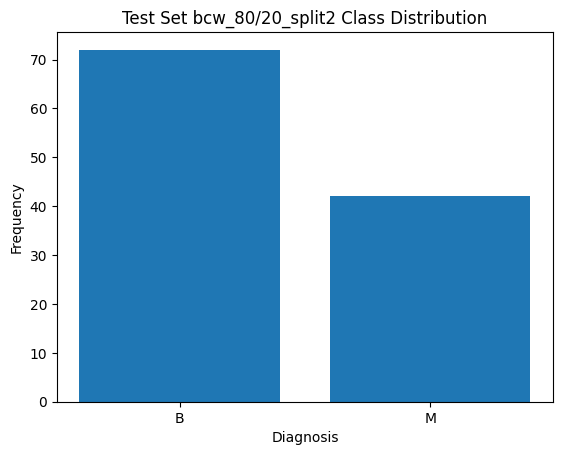

Class distribution for bcw_80/20_split3 Train Set:


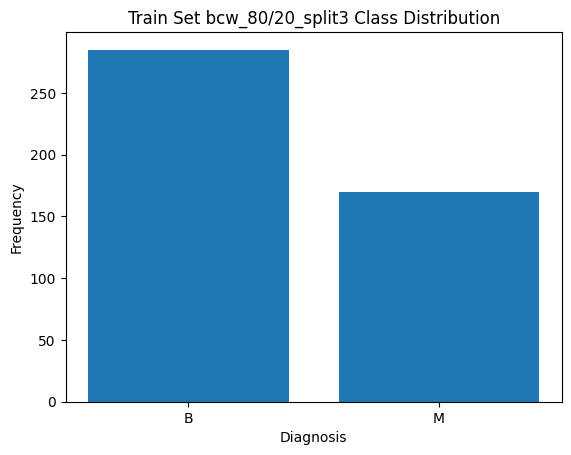

Class distribution for bcw_80/20_split3 Test Set:


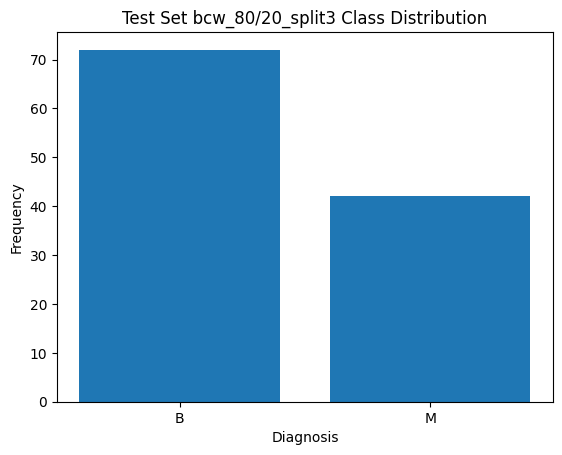

Class distribution for bcw_80/20_split4 Train Set:


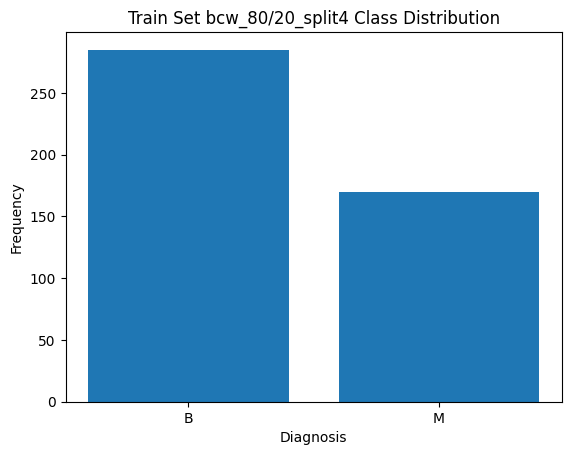

Class distribution for bcw_80/20_split4 Test Set:


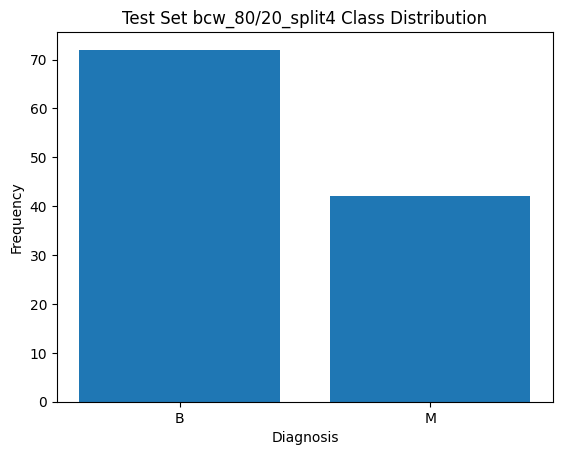

Class distribution for bcw_90/10_split1 Train Set:


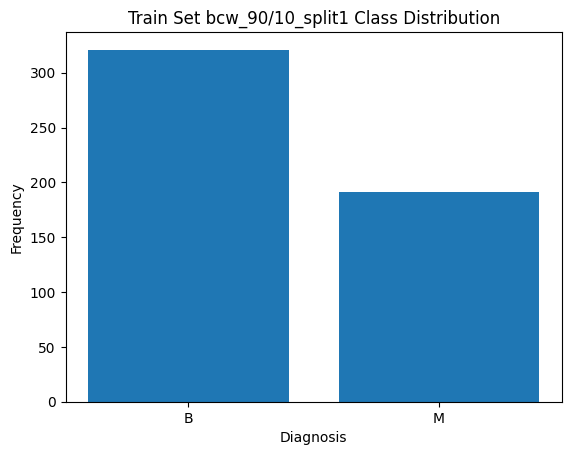

Class distribution for bcw_90/10_split1 Test Set:


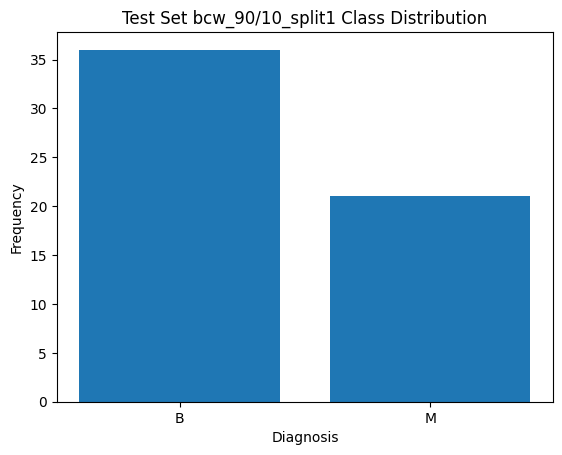

Class distribution for bcw_90/10_split2 Train Set:


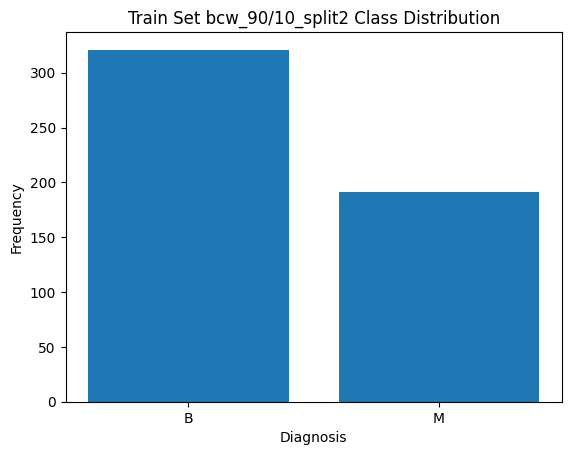

Class distribution for bcw_90/10_split2 Test Set:


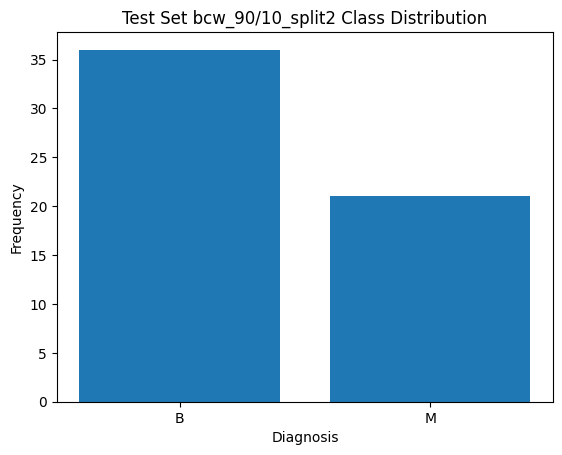

Class distribution for bcw_90/10_split3 Train Set:


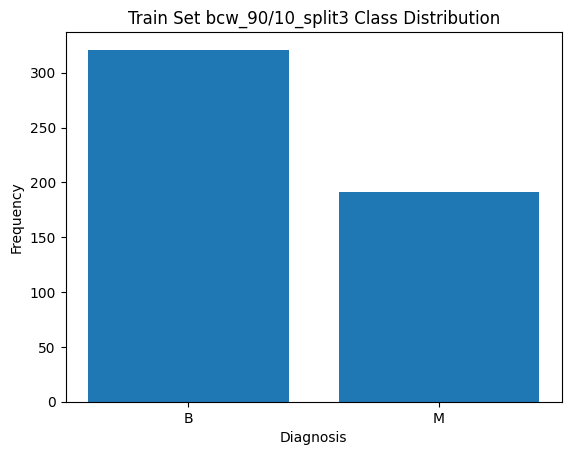

Class distribution for bcw_90/10_split3 Test Set:


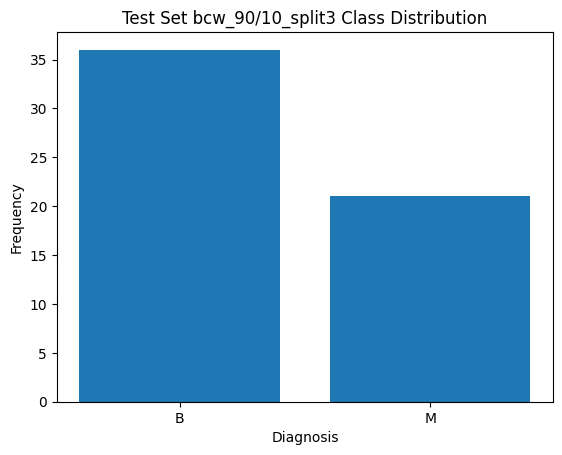

Class distribution for bcw_90/10_split4 Train Set:


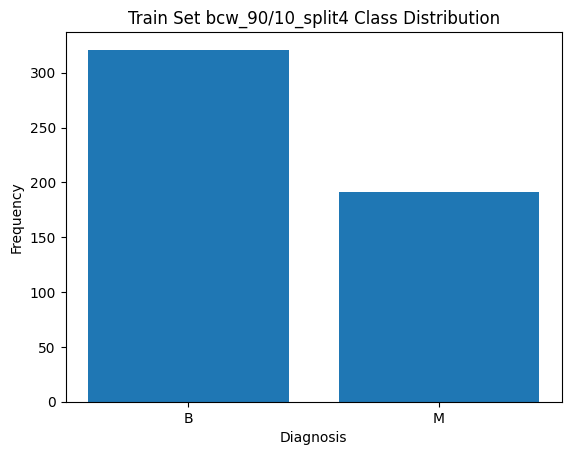

Class distribution for bcw_90/10_split4 Test Set:


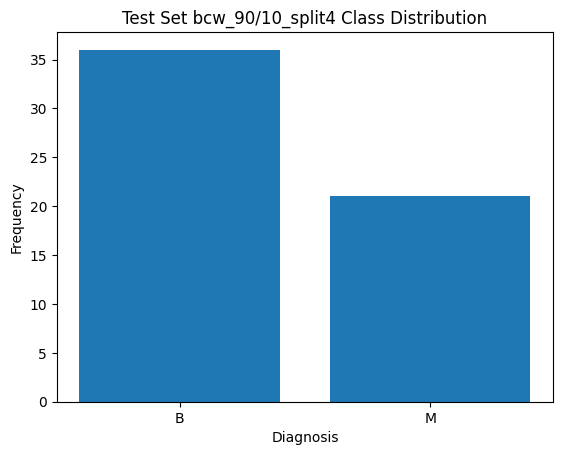

In [9]:
ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
n_splits = 4
subsets_bcw = split_and_plot_data(X_bcw, y_bcw, ratios, n_splits, dataset_name="bcw")

### Wine Quality

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X_wq = wine_quality.data.features
y_wq = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [11]:
print("Features Shape:", X_wq.shape)
print("Labels Shape:", y_wq.shape)
print("Class Distribution:\n", y_wq.value_counts())

Features Shape: (6497, 11)
Labels Shape: (6497, 1)
Class Distribution:
 quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
Name: count, dtype: int64


In [12]:
X_wq.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


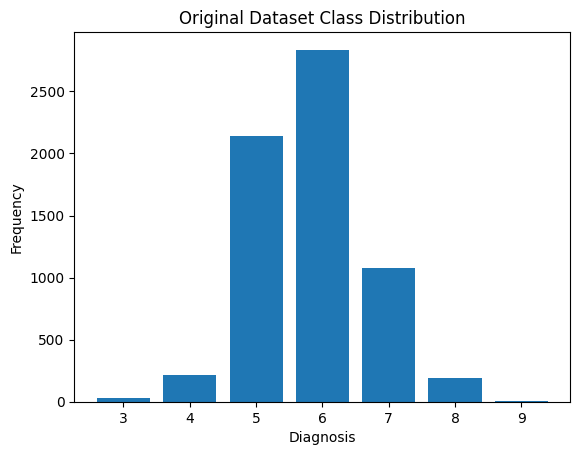

In [13]:
plot_class_distribution(y_wq, "Original Dataset Class Distribution")

Class distribution for wq_40/60_split1 Train Set:


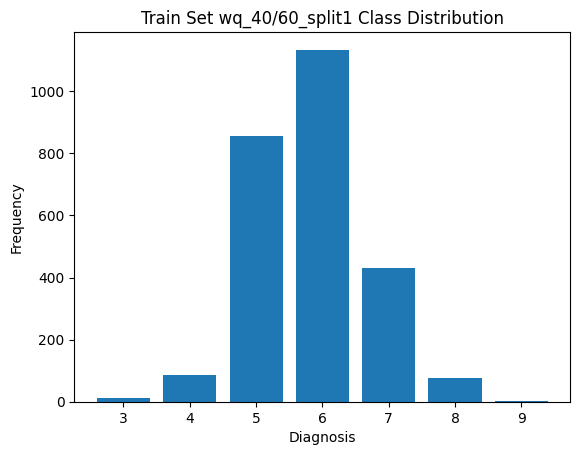

Class distribution for wq_40/60_split1 Test Set:


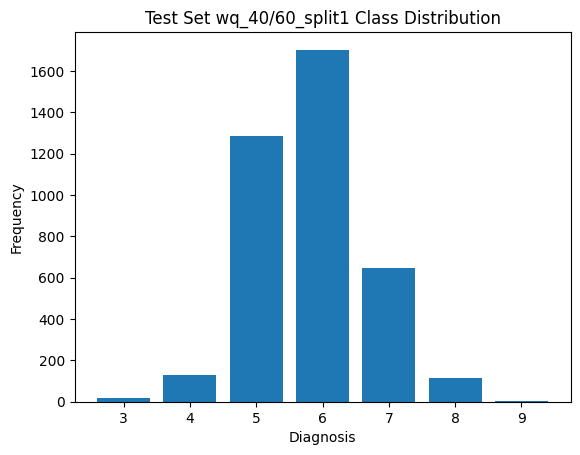

Class distribution for wq_40/60_split2 Train Set:


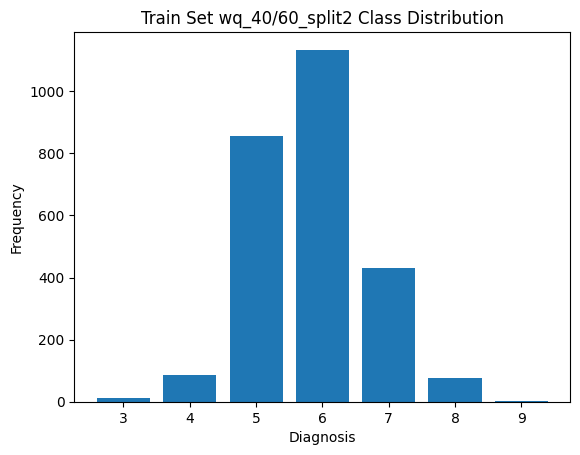

Class distribution for wq_40/60_split2 Test Set:


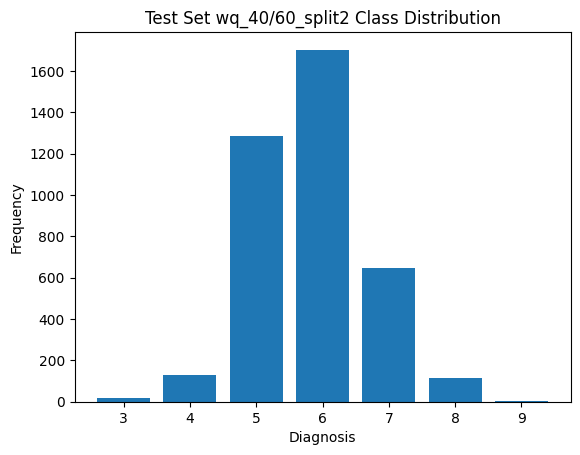

Class distribution for wq_40/60_split3 Train Set:


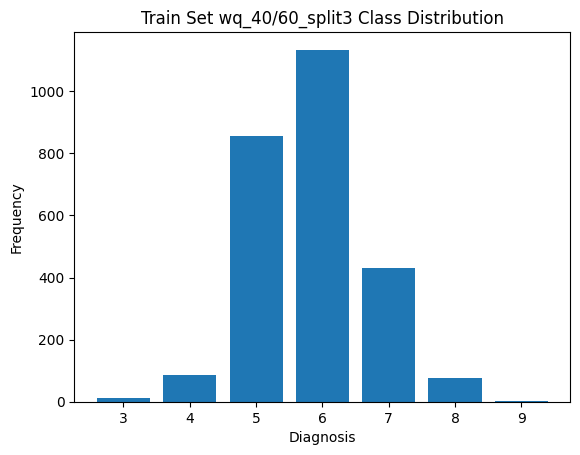

Class distribution for wq_40/60_split3 Test Set:


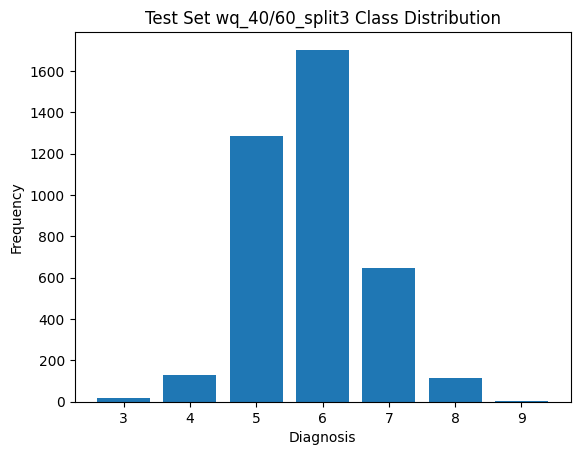

Class distribution for wq_40/60_split4 Train Set:


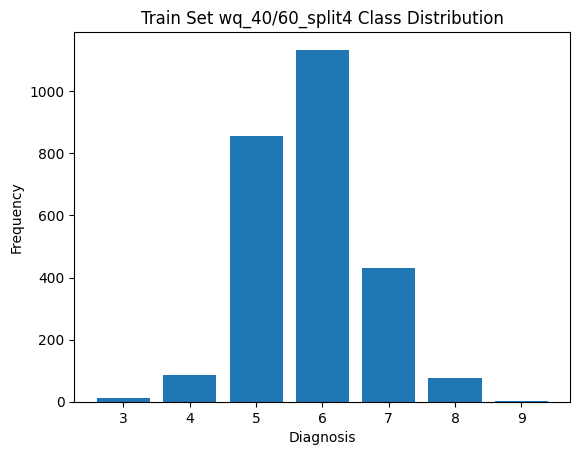

Class distribution for wq_40/60_split4 Test Set:


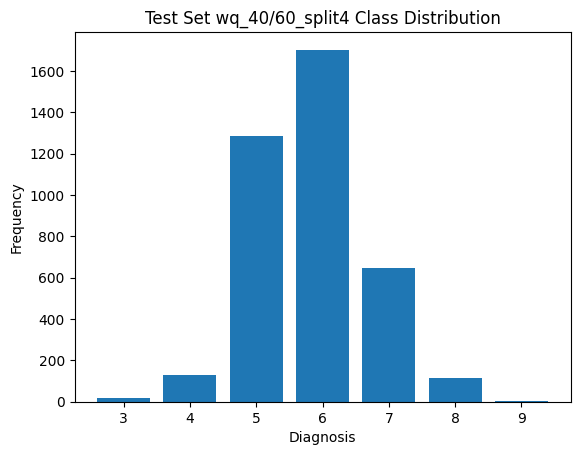

Class distribution for wq_60/40_split1 Train Set:


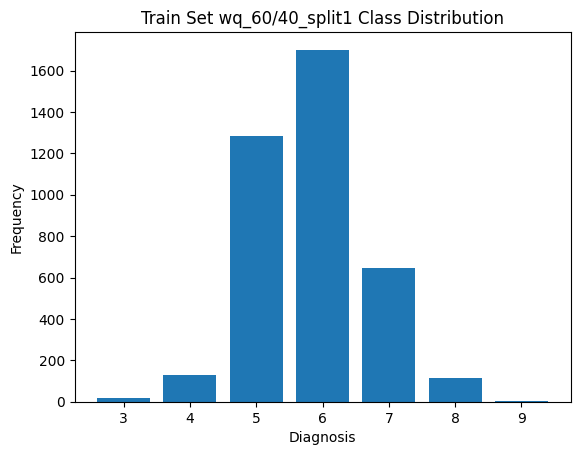

Class distribution for wq_60/40_split1 Test Set:


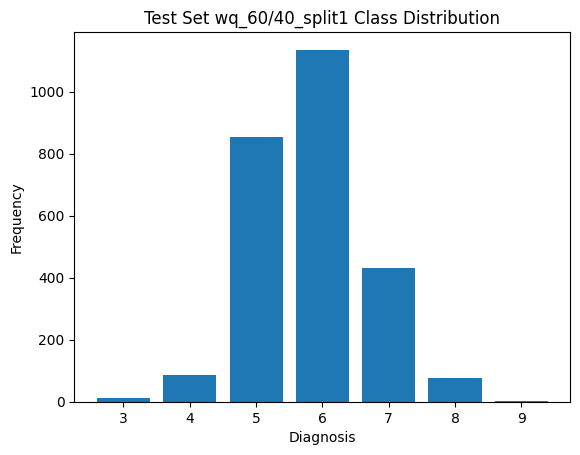

Class distribution for wq_60/40_split2 Train Set:


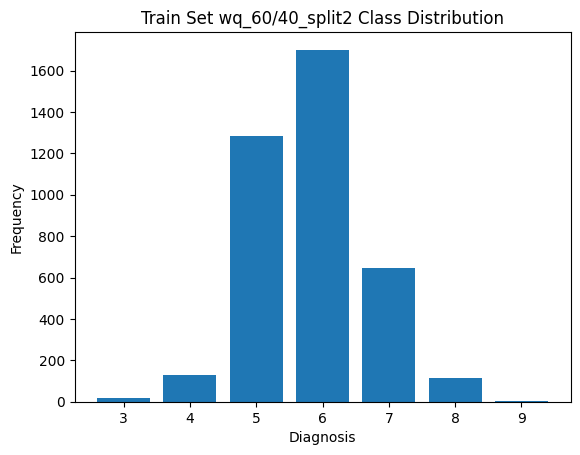

Class distribution for wq_60/40_split2 Test Set:


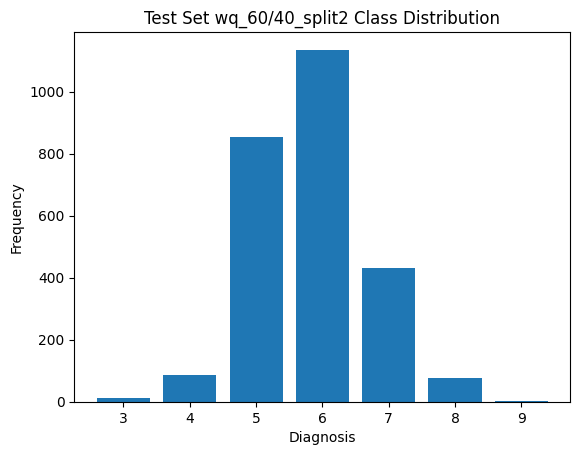

Class distribution for wq_60/40_split3 Train Set:


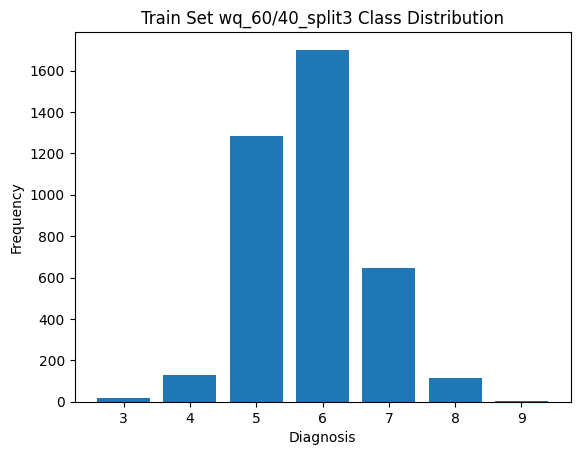

Class distribution for wq_60/40_split3 Test Set:


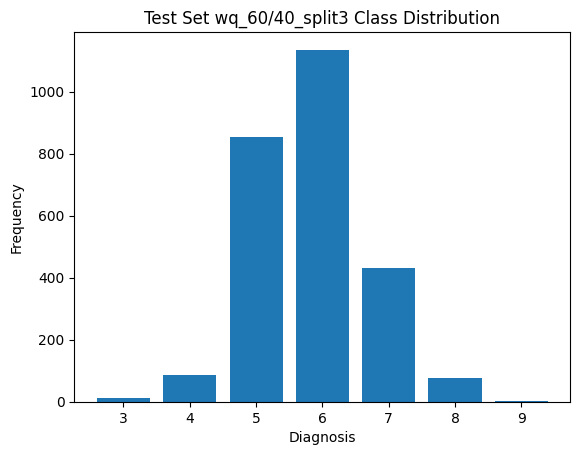

Class distribution for wq_60/40_split4 Train Set:


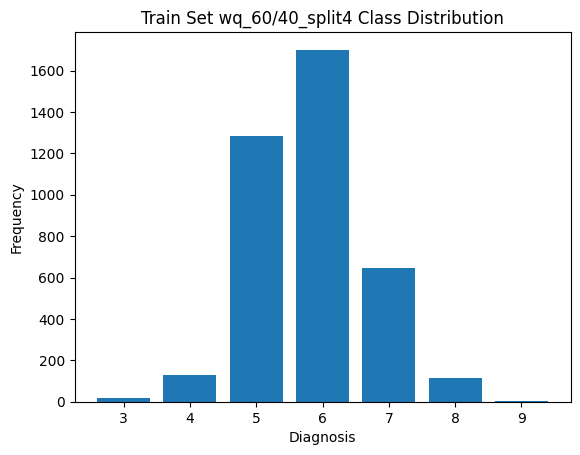

Class distribution for wq_60/40_split4 Test Set:


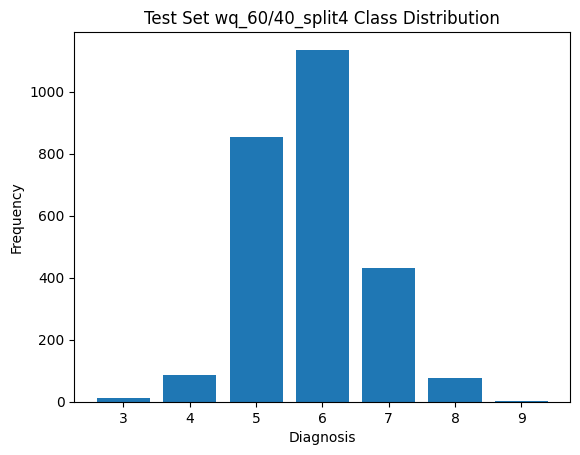

Class distribution for wq_80/20_split1 Train Set:


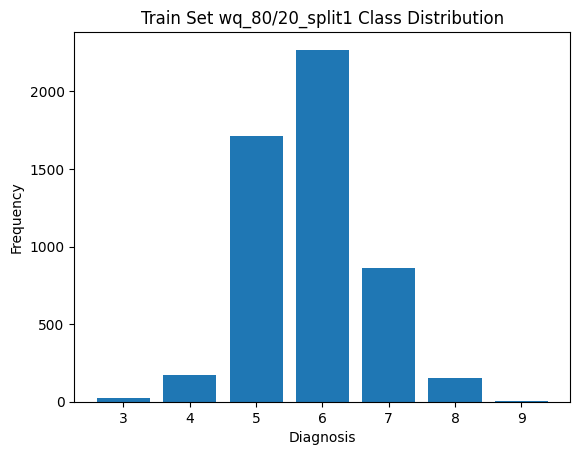

Class distribution for wq_80/20_split1 Test Set:


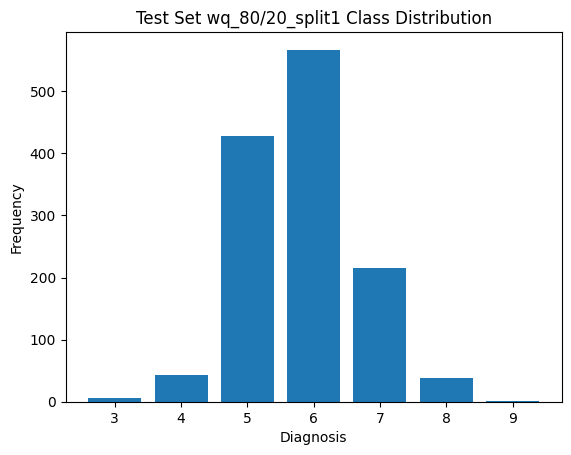

Class distribution for wq_80/20_split2 Train Set:


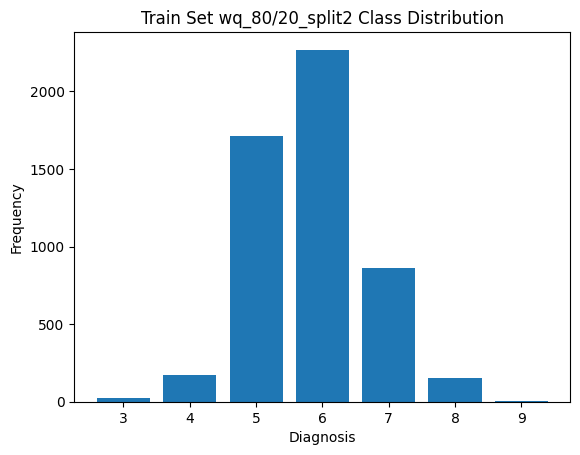

Class distribution for wq_80/20_split2 Test Set:


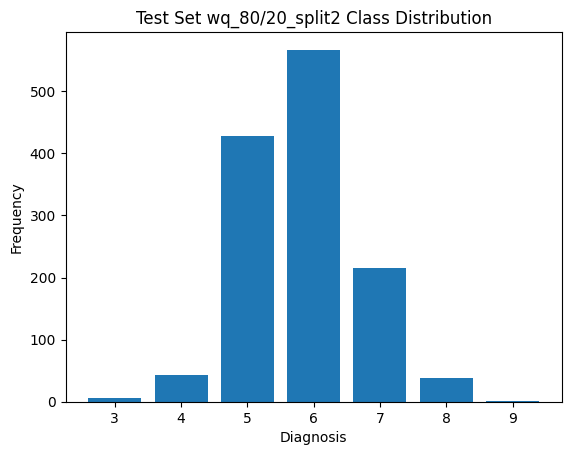

Class distribution for wq_80/20_split3 Train Set:


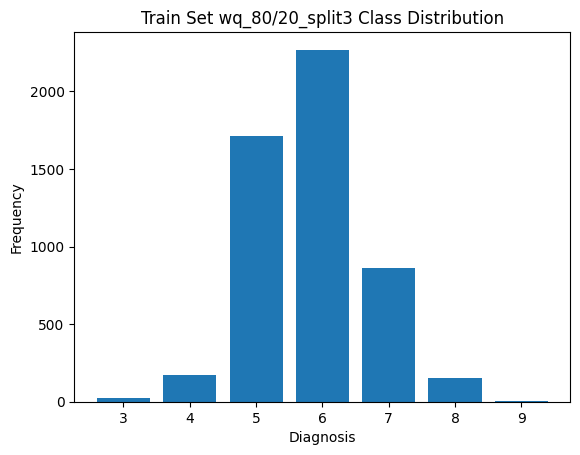

Class distribution for wq_80/20_split3 Test Set:


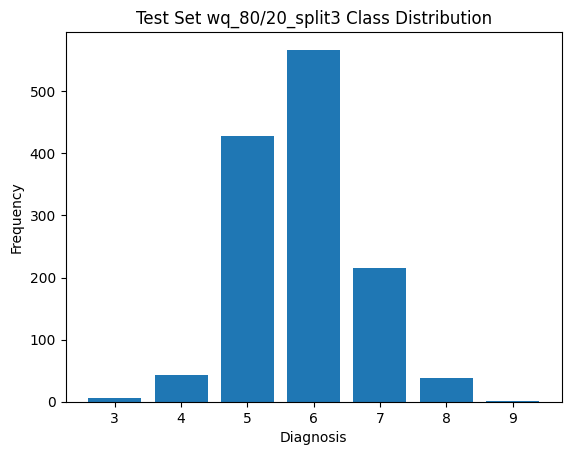

Class distribution for wq_80/20_split4 Train Set:


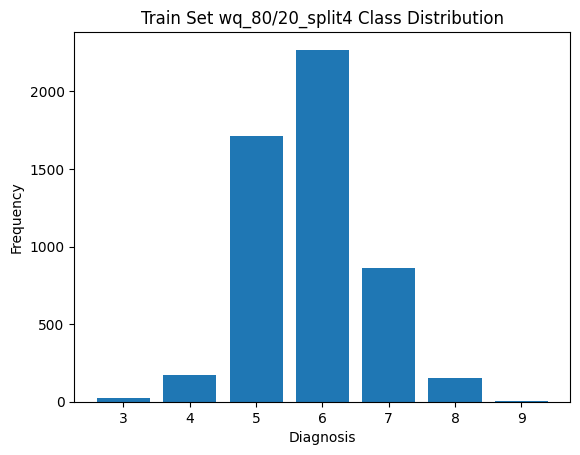

Class distribution for wq_80/20_split4 Test Set:


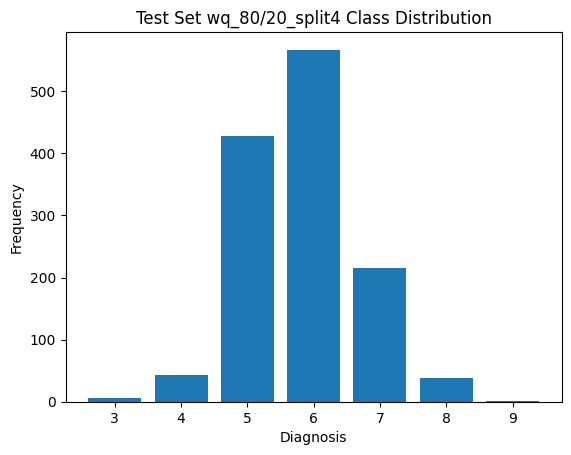

Class distribution for wq_90/10_split1 Train Set:


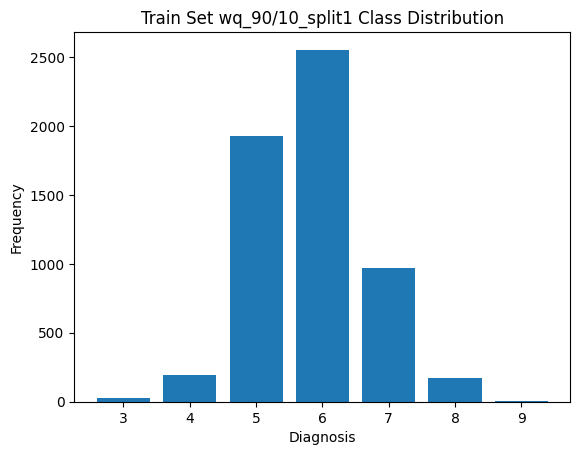

Class distribution for wq_90/10_split1 Test Set:


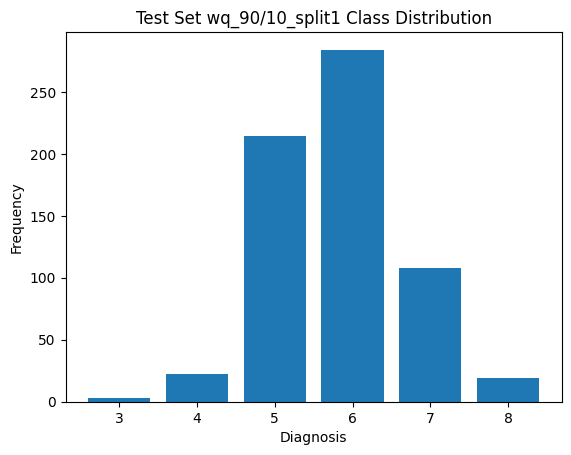

Class distribution for wq_90/10_split2 Train Set:


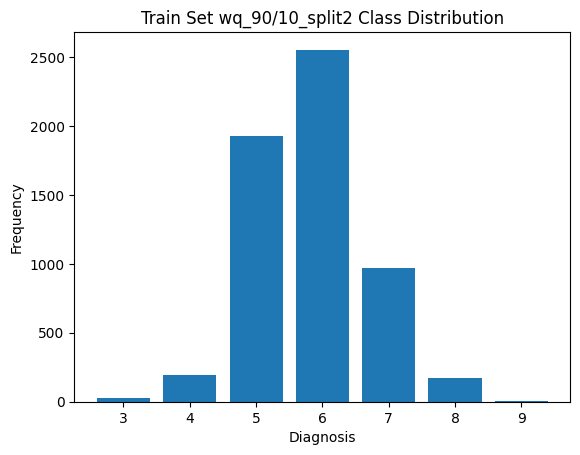

Class distribution for wq_90/10_split2 Test Set:


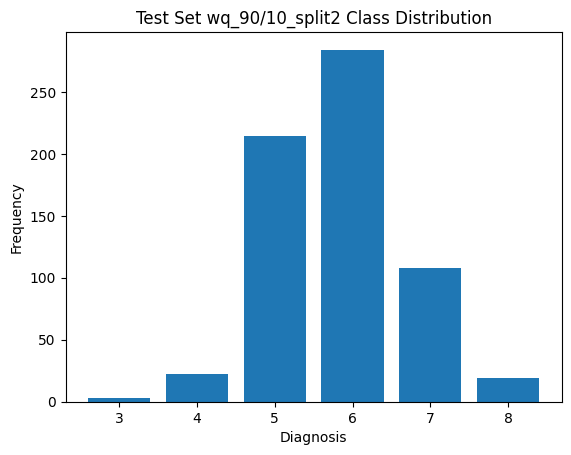

Class distribution for wq_90/10_split3 Train Set:


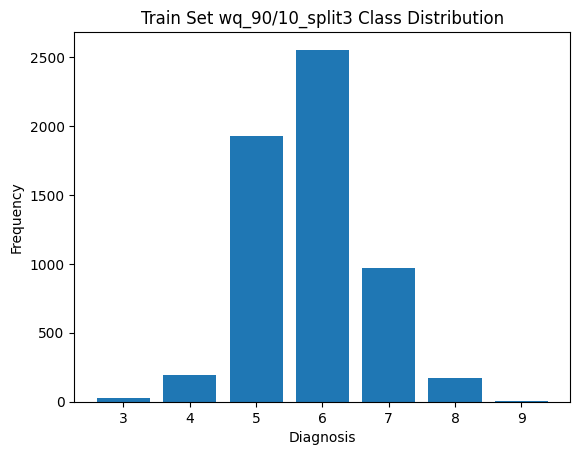

Class distribution for wq_90/10_split3 Test Set:


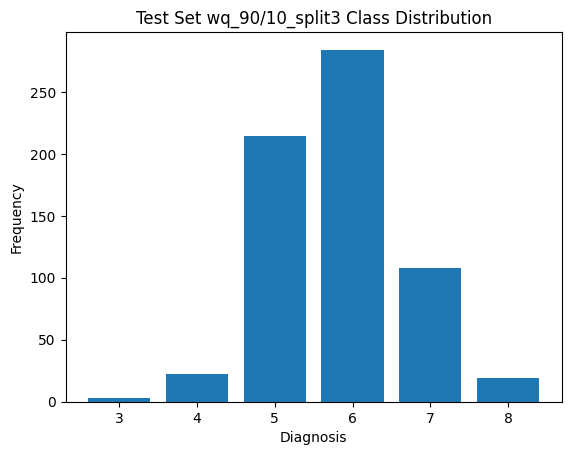

Class distribution for wq_90/10_split4 Train Set:


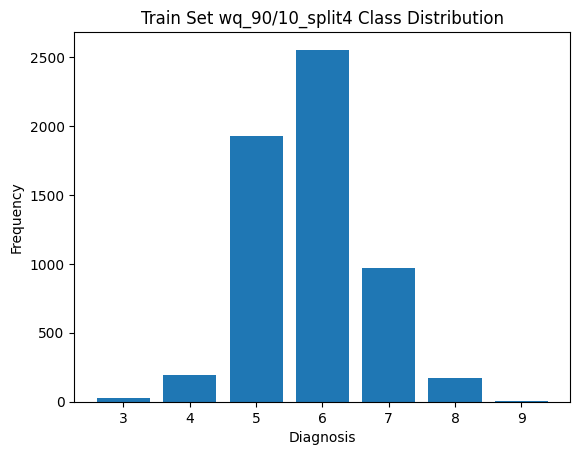

Class distribution for wq_90/10_split4 Test Set:


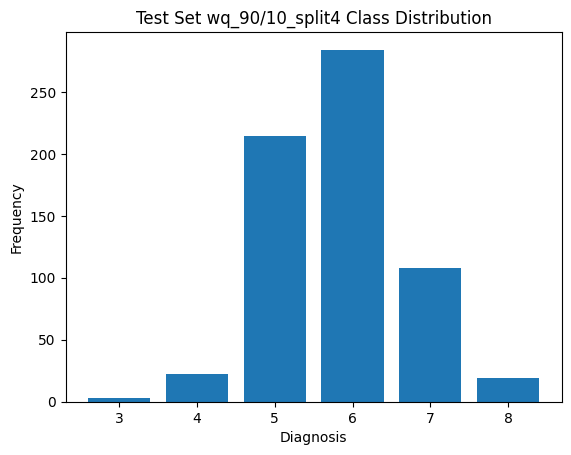

In [14]:
ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
n_splits = 4
subsets_wq = split_and_plot_data(X_wq, y_wq, ratios, n_splits, dataset_name="wq")

### Car Evaluation

In [15]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X_car = car_evaluation.data.features
y_car = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [16]:
print("Features Shape:", X_car.shape)
print("Labels Shape:", y_car.shape)
print("Class Distribution:\n", y_car.value_counts())

Features Shape: (1728, 6)
Labels Shape: (1728, 1)
Class Distribution:
 class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [17]:
X_car.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


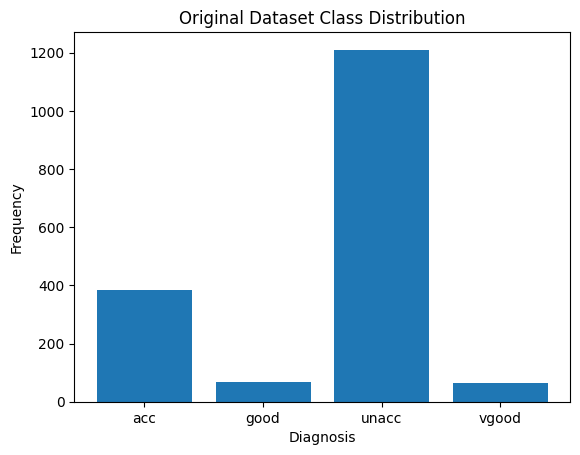

In [18]:
plot_class_distribution(y_car, "Original Dataset Class Distribution")

Class distribution for car_40/60_split1 Train Set:


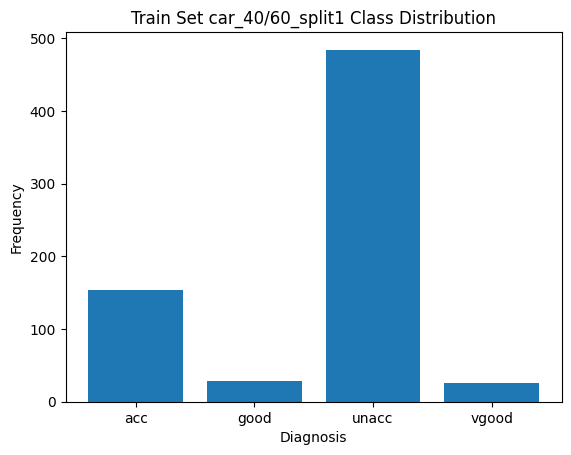

Class distribution for car_40/60_split1 Test Set:


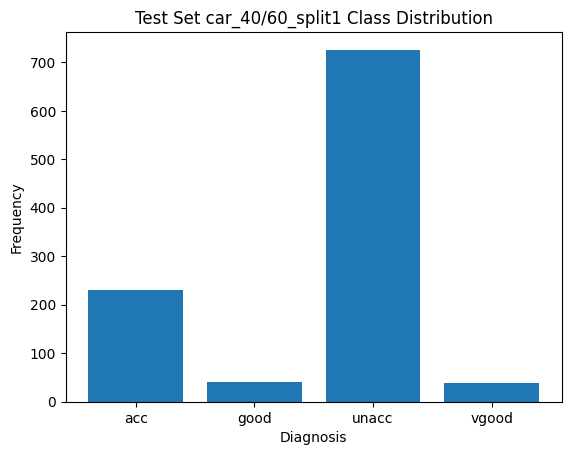

Class distribution for car_40/60_split2 Train Set:


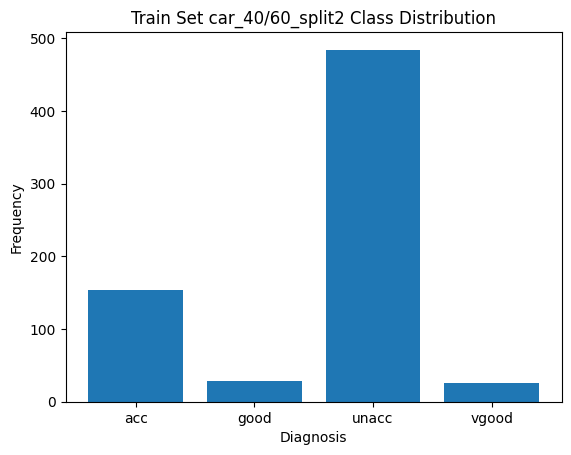

Class distribution for car_40/60_split2 Test Set:


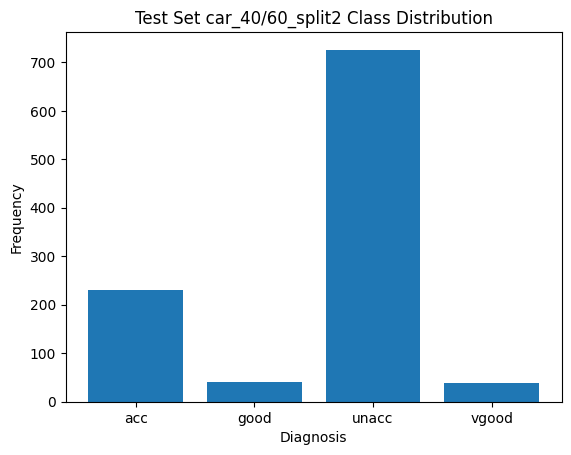

Class distribution for car_40/60_split3 Train Set:


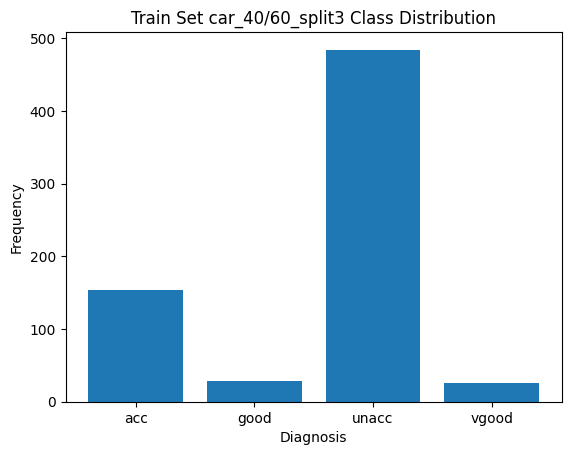

Class distribution for car_40/60_split3 Test Set:


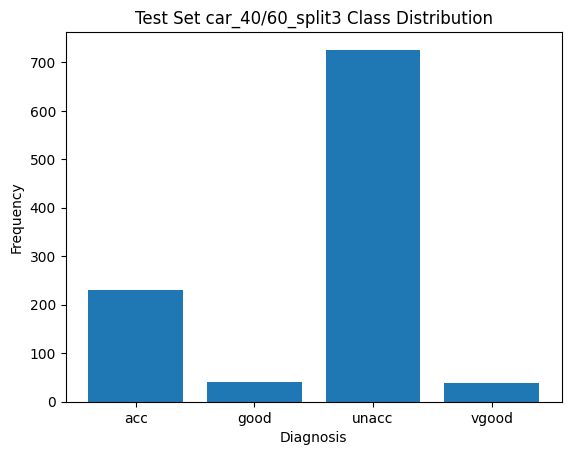

Class distribution for car_40/60_split4 Train Set:


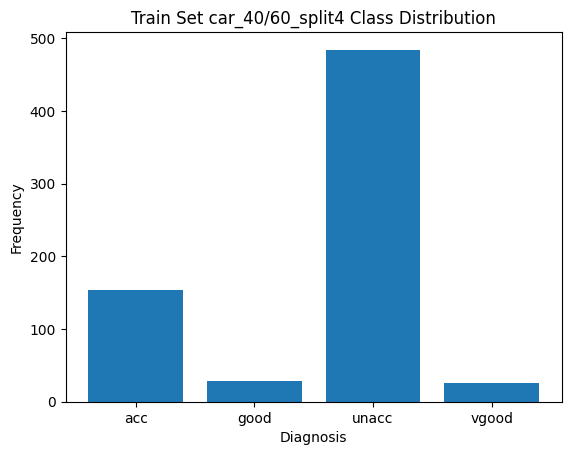

Class distribution for car_40/60_split4 Test Set:


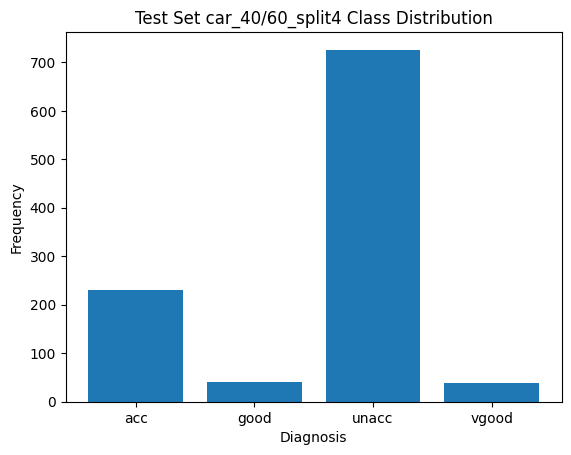

Class distribution for car_60/40_split1 Train Set:


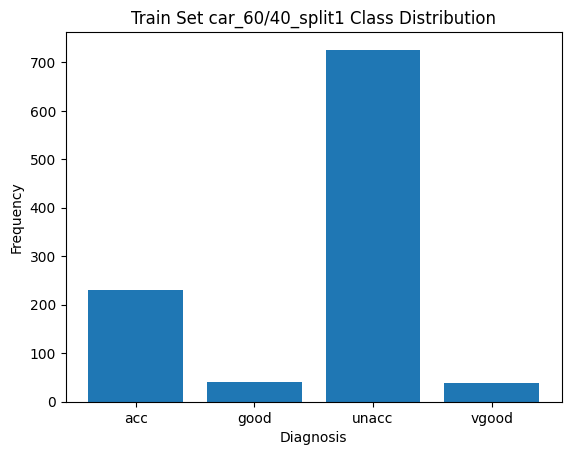

Class distribution for car_60/40_split1 Test Set:


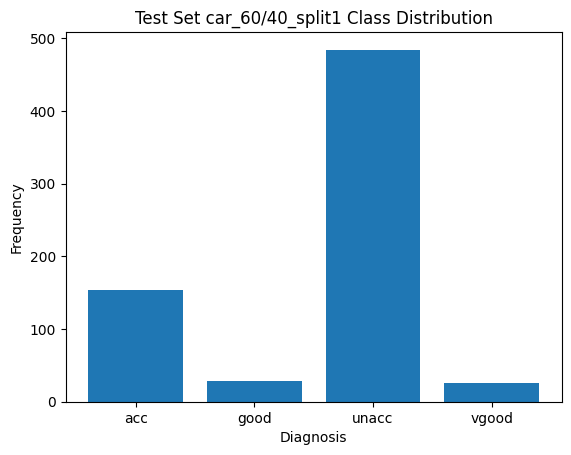

Class distribution for car_60/40_split2 Train Set:


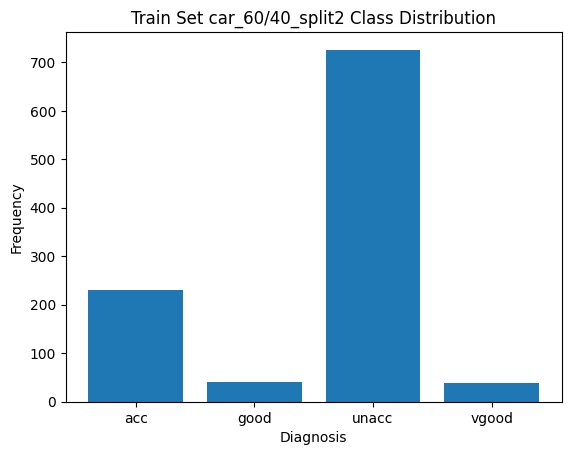

Class distribution for car_60/40_split2 Test Set:


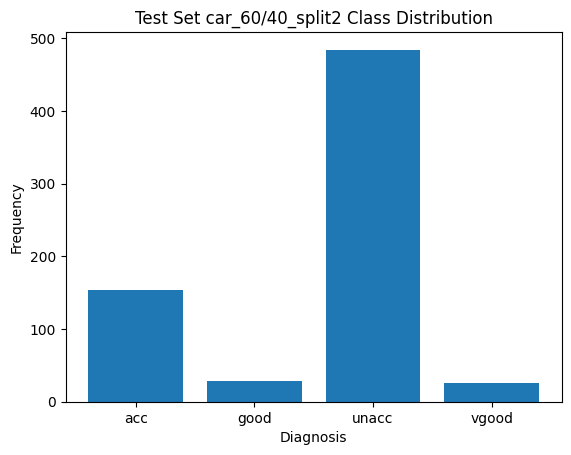

Class distribution for car_60/40_split3 Train Set:


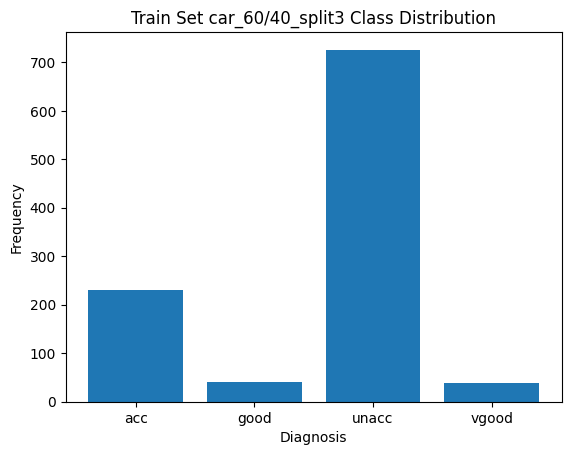

Class distribution for car_60/40_split3 Test Set:


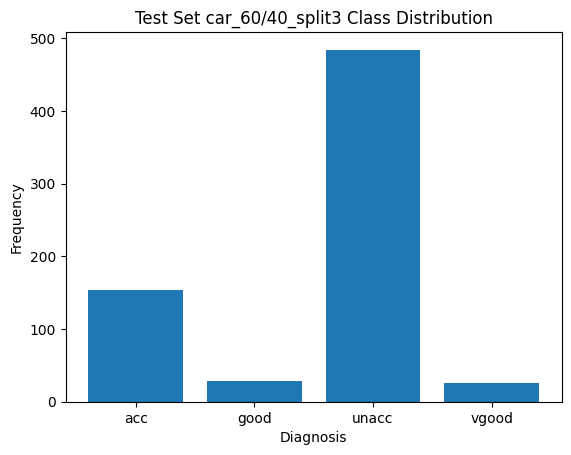

Class distribution for car_60/40_split4 Train Set:


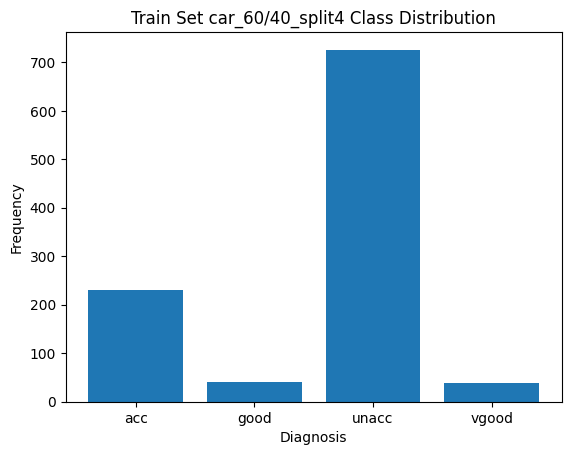

Class distribution for car_60/40_split4 Test Set:


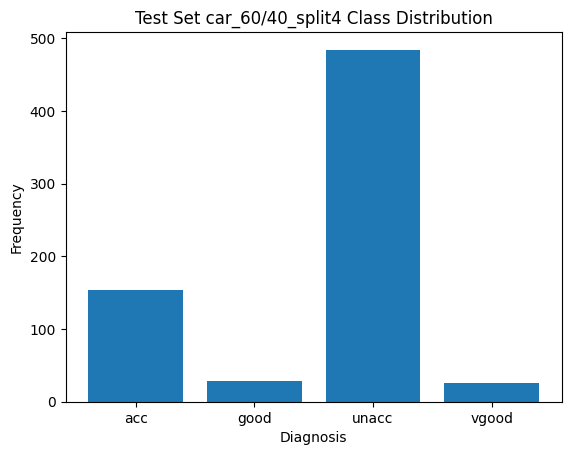

Class distribution for car_80/20_split1 Train Set:


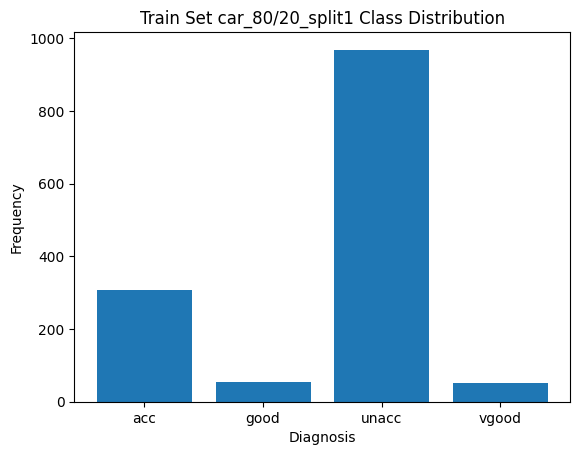

Class distribution for car_80/20_split1 Test Set:


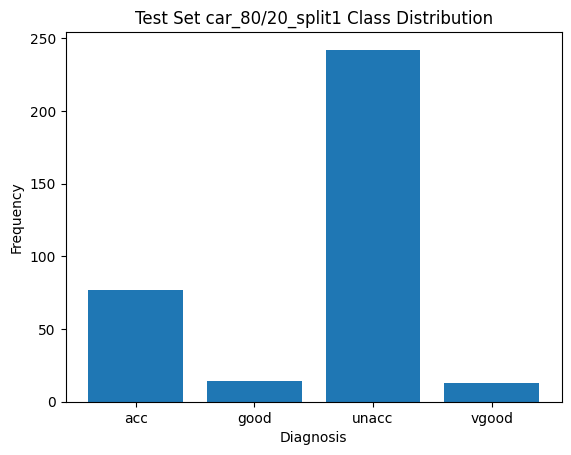

Class distribution for car_80/20_split2 Train Set:


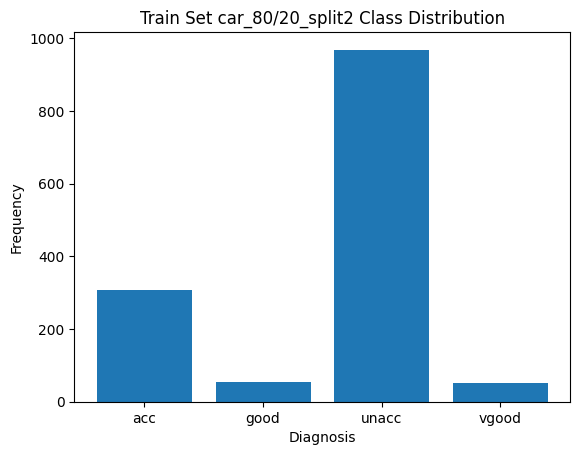

Class distribution for car_80/20_split2 Test Set:


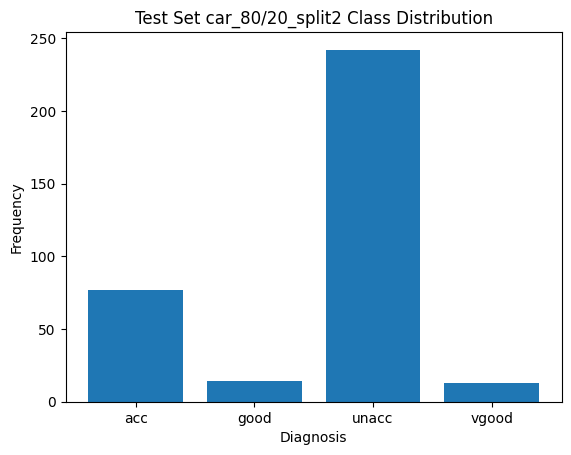

Class distribution for car_80/20_split3 Train Set:


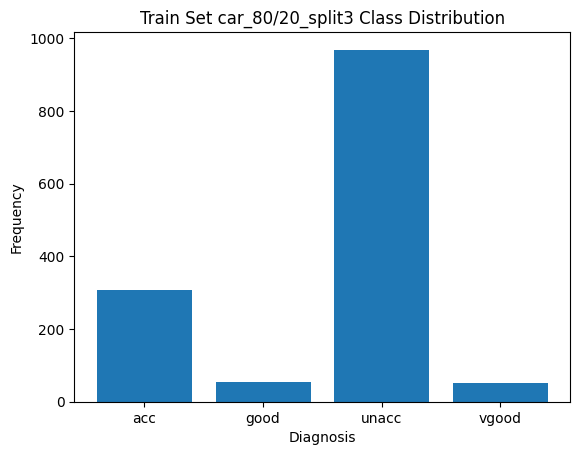

Class distribution for car_80/20_split3 Test Set:


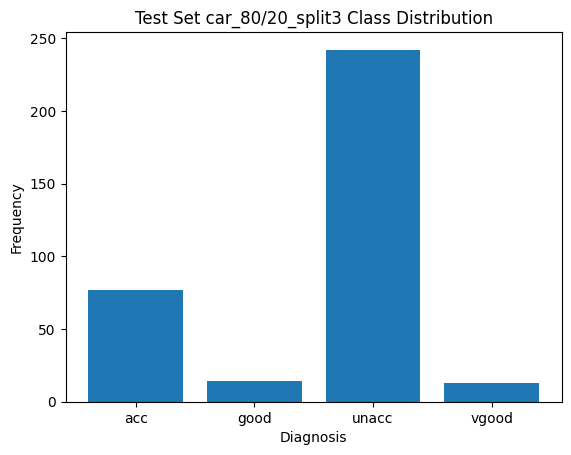

Class distribution for car_80/20_split4 Train Set:


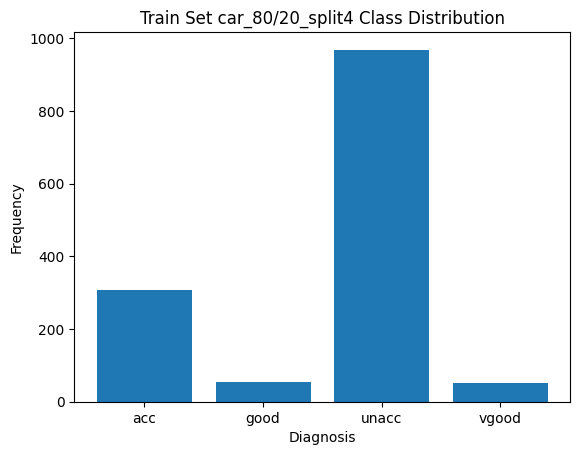

Class distribution for car_80/20_split4 Test Set:


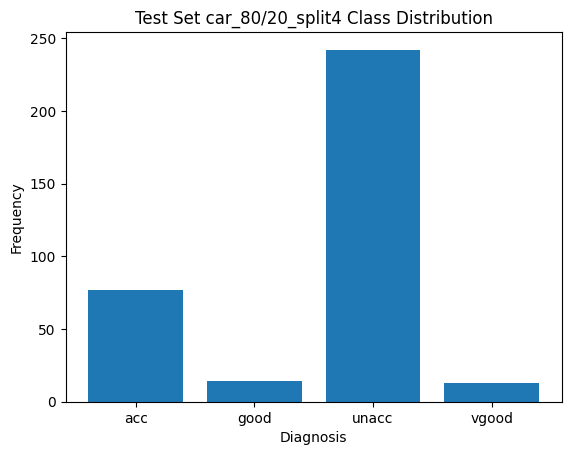

Class distribution for car_90/10_split1 Train Set:


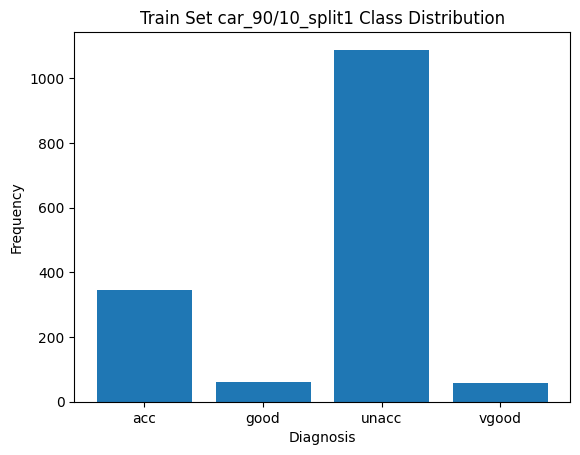

Class distribution for car_90/10_split1 Test Set:


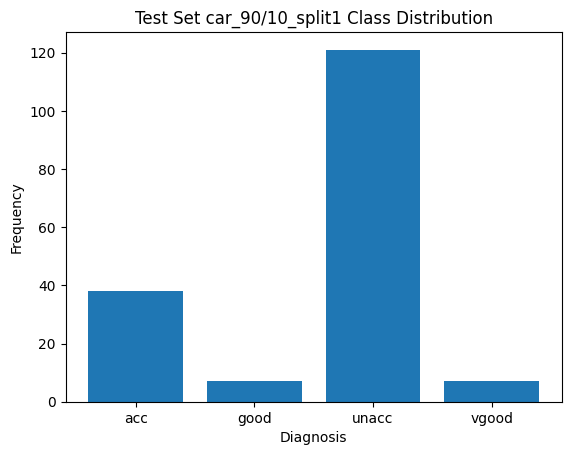

Class distribution for car_90/10_split2 Train Set:


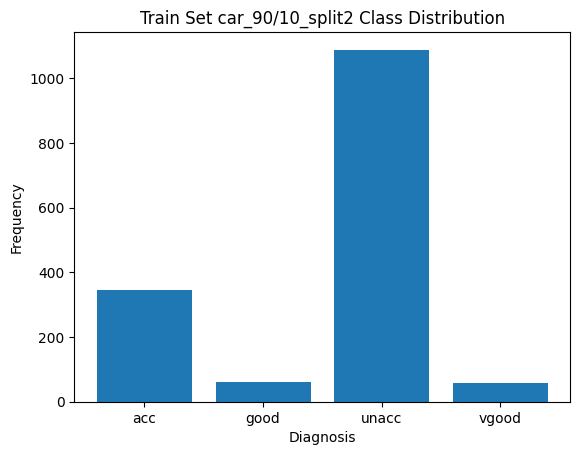

Class distribution for car_90/10_split2 Test Set:


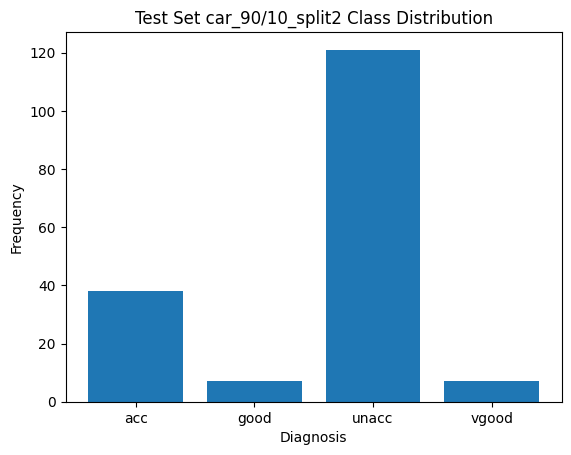

Class distribution for car_90/10_split3 Train Set:


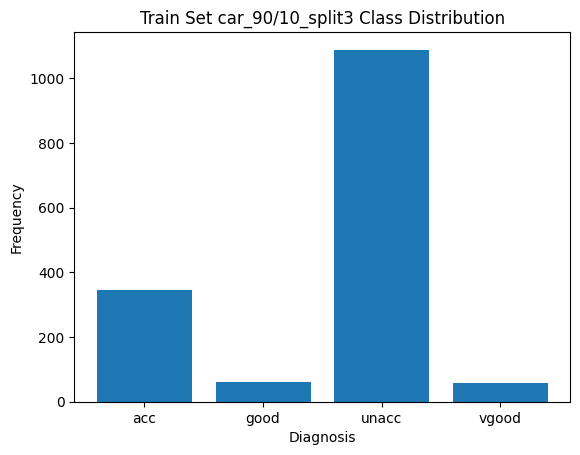

Class distribution for car_90/10_split3 Test Set:


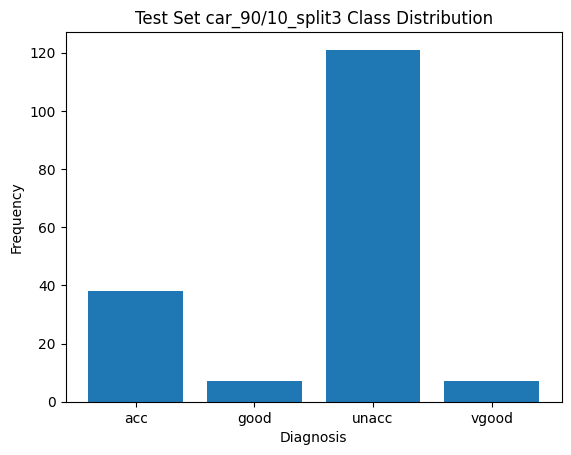

Class distribution for car_90/10_split4 Train Set:


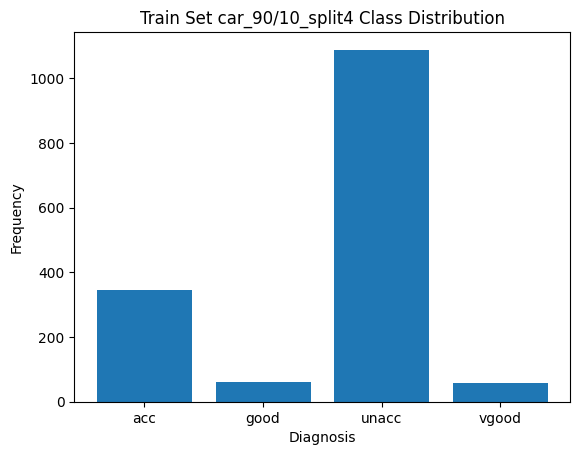

Class distribution for car_90/10_split4 Test Set:


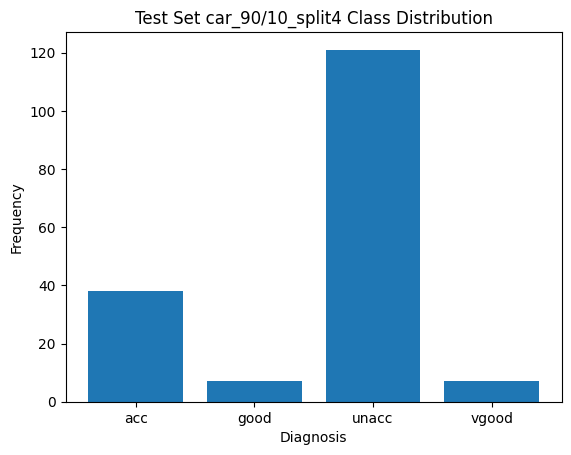

In [19]:
ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
n_splits = 4
subsets_car = split_and_plot_data(X_car, y_car, ratios, n_splits, dataset_name="car")

## 2. Train

In [20]:
def train_model_on_split(subsets, dataset_name, ratio_key):
    X_train = subsets[ratio_key]["feature_train"]
    y_train = subsets[ratio_key]["label_train"]
    X_test = subsets[ratio_key]["feature_test"]
    y_test = subsets[ratio_key]["label_test"]

    encoder = LabelEncoder()

    for column in X_train.columns:
        if X_train[column].dtype == 'object':
            encoder.fit(X_train[column])
            X_train[column] = encoder.transform(X_train[column])
            X_test[column] = encoder.transform(X_test[column])

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy on {dataset_name} - {ratio_key}: {accuracy:.4f}")
    return model

In [21]:
bcw_model = train_model_on_split(subsets_bcw, dataset_name="bcw", ratio_key="bcw_60/40_split1")

Accuracy on bcw - bcw_60/40_split1: 0.9211


In [22]:
wq_model = train_model_on_split(subsets_wq, dataset_name="wq", ratio_key="wq_60/40_split1")

Accuracy on wq - wq_60/40_split1: 0.5768


In [23]:
car_model = train_model_on_split(subsets_car, dataset_name="car", ratio_key="car_60/40_split1")

Accuracy on car - car_60/40_split1: 0.9725
